In [1]:
import json

import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open("aggregated.json") as f:
    data = json.loads(f.read())

## How often are benchmarks not cited?

In [3]:
def used_any_benchmark(d):
    not_custom = [s for s in d["whichdata"] if s != "custom" and s != "custom simulated"]
    return len(not_custom) > 0

ub = 0
ubnc = 0
for d in data:
    if used_any_benchmark(d):
        ub = ub + 1
        if d["didcite"] != "all" and d["didcite"] != "":
            ubnc = ubnc + 1
        if d["didcite"] == "":
            print(d["ind"], "needs filling")
            
print(ub, "papers found that used a benchmark")
print(ubnc, "of those missed or improperly cited at least one of those benchmarks")
print("That's {:0.1f} per cent!".format(100*ubnc/ub))

108 needs filling
459 needs filling
224 papers found that used a benchmark
63 of those missed or improperly cited at least one of those benchmarks
That's 28.1 per cent!


## How often is custom data used?

In [4]:
def used_custom_data(d):
    not_custom = [s for s in d["whichdata"] if s == "custom" or s == "custom simulated"]
    return len(not_custom) > 0

du = 0
dure = 0
for d in data:
    if used_custom_data(d):
        du = du + 1
        if d["didpublish"] != "no" and d["didpublish"] != "":
            dure = dure + 1
        if d["didpublish"] == "":
            print(d["ind"], "needs filling")
            
print(du, "papers found that used custom data")
print(dure, "of those released or promised to release their data")
print("That's {:0.1f} per cent!".format(100*dure/du))

2 needs filling
73 needs filling
102 needs filling
167 needs filling
321 needs filling
362 needs filling
418 needs filling
437 needs filling
546 needs filling
552 needs filling
313 papers found that used custom data
15 of those released or promised to release their data
That's 4.8 per cent!


In [5]:
du = 0
dure = 0
for d in data:
    if used_custom_data(d) and used_any_benchmark(d):
        du = du + 1
        if d["didpublish"] != "no" and d["didpublish"] != "":
            dure = dure + 1
        if d["didpublish"] == "":
            print(d["ind"], "needs filling")
            
print(du, "papers found that used custom and benchmark data")
print(dure, "of those released or promised to release their data")
print("That's {:0.1f} per cent!".format(100*dure/du))

2 needs filling
73 needs filling
102 needs filling
167 needs filling
321 needs filling
362 needs filling
418 needs filling
437 needs filling
546 needs filling
552 needs filling
28 papers found that used custom and benchmark data
3 of those released or promised to release their data
That's 10.7 per cent!


## How often are MICCAI papers cited?

65 needs reviewing
87 needs reviewing
166 needs reviewing
[243.66666667]


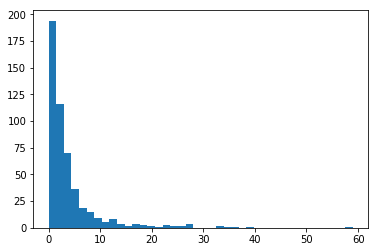

4.508234519104085


In [6]:
citations = []
for d in data:
    if used_custom_data(d) or used_any_benchmark(d):
        try:
            citations = citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")
            
cits = np.sort(np.array(citations))
print(cits[cits > 100])
plt.hist(cits[cits <= 100], bins=40)
plt.show()
print(np.mean(cits))

## What if we partition by benchmark vs custom?

65 needs reviewing
87 needs reviewing
166 needs reviewing
Excluding... []
Total: 235
5.537163120567376


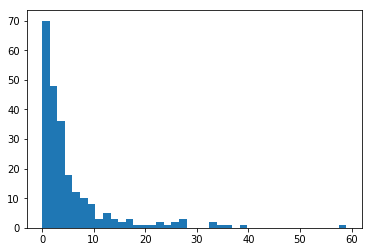



Excluding... [243.66666667]
Total: 271
2.730873308733087


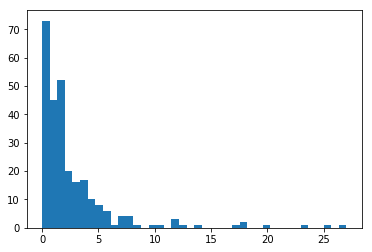



Excluding... []
Total: 12
9.097222222222223


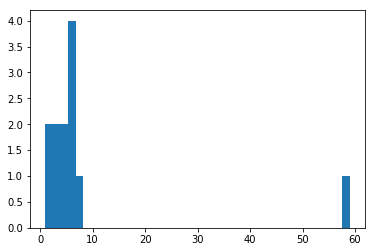

In [7]:
def used_custom_nore(d):
    custom = [s for s in d["whichdata"] if s == "custom" or s == "custom simulated"]
    return len(custom) == len(d["whichdata"]) and d["didpublish"] == "no" 

def used_custom_re(d):
    custom = [s for s in d["whichdata"] if s == "custom" or s == "custom simulated"]
    return len(custom) == len(d["whichdata"]) and d["didpublish"] != "no" and d["didpublish"] != ""

bnch_citations = []
cstm_citations = []
csre_citations = []
for d in data:
    if used_any_benchmark(d) or used_custom_re(d):
        try:
            bnch_citations = bnch_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")
    elif used_custom_nore(d):
        try:
            cstm_citations = cstm_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")
    if used_custom_re(d):
        try:
            csre_citations = csre_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")

            
# First benchmark
bnch_cits = np.sort(np.array(bnch_citations))
print("Excluding...", bnch_cits[bnch_cits > 100])
print("Total:", bnch_cits[bnch_cits <= 100].shape[0])
print(np.mean(bnch_cits[bnch_cits <= 100]))
plt.hist(bnch_cits[bnch_cits <= 100], bins=40)
plt.show()

print("\n")
# Then custom no release
cstm_cits = np.sort(np.array(cstm_citations))
print("Excluding...", cstm_cits[cstm_cits > 100])
print("Total:", cstm_cits[cstm_cits <= 100].shape[0])
print(np.mean(cstm_cits[cstm_cits <= 100]))
plt.hist(cstm_cits[cstm_cits <= 100], bins=40)
plt.show()

print("\n")
# Then custom and release
csre_cits = np.sort(np.array(csre_citations))
print("Excluding...", csre_cits[csre_cits > 100])
print("Total:", csre_cits[csre_cits <= 100].shape[0])
print(np.mean(csre_cits[csre_cits <= 100]))
plt.hist(csre_cits[csre_cits <= 100], bins=40)
plt.show()


## What if we partition by releasing code or no?

65 needs reviewing
87 needs reviewing
166 needs reviewing
Excluding... [243.66666667]
Total: 38
7.415789473684209


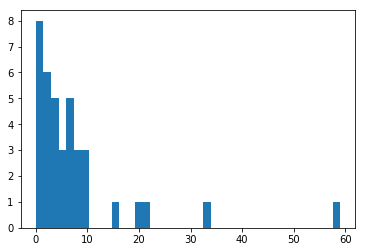



Excluding... []
Total: 467
3.7595289079229124


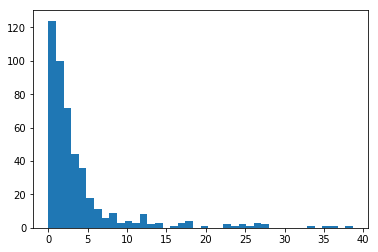

In [8]:
def released_code(d):
    return d["code"] == "on"

bnch_citations = []
cstm_citations = []
for d in data:
    if not used_custom_data(d) and not used_any_benchmark(d):
        continue
    if released_code(d):
        try:
            bnch_citations = bnch_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")
    else:
        try:
            cstm_citations = cstm_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")

            
# First benchmark
bnch_cits = np.sort(np.array(bnch_citations))
print("Excluding...", bnch_cits[bnch_cits > 100])
print("Total:", bnch_cits[bnch_cits <= 100].shape[0])
print(np.mean(bnch_cits[bnch_cits <= 100]))
plt.hist(bnch_cits[bnch_cits <= 100], bins=40)
plt.show()

print("\n")
# Then custom no release
cstm_cits = np.sort(np.array(cstm_citations))
print("Excluding...", cstm_cits[cstm_cits > 100])
print("Total:", cstm_cits[cstm_cits <= 100].shape[0])
print(np.mean(cstm_cits[cstm_cits <= 100]))
plt.hist(cstm_cits[cstm_cits <= 100], bins=40)
plt.show()


## What if we partition by open access vs no?

65 needs reviewing
87 needs reviewing
166 needs reviewing
Excluding... [243.66666667]
Total: 435
4.3053639846743295


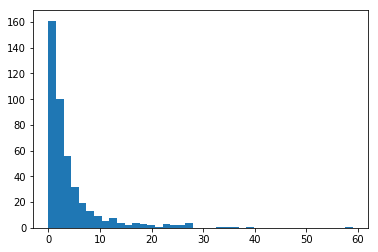



Excluding... []
Total: 70
2.3523809523809525


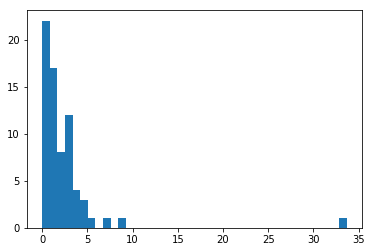

In [9]:
def open_access(d):
    return "on" in d["preprint"] + d["personal"]

bnch_citations = []
cstm_citations = []
for d in data:
    if not used_custom_data(d) and not used_any_benchmark(d):
        continue
    if open_access(d):
        try:
            bnch_citations = bnch_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")
    else:
        try:
            cstm_citations = cstm_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")

            
# First benchmark
bnch_cits = np.sort(np.array(bnch_citations))
print("Excluding...", bnch_cits[bnch_cits > 100])
print("Total:", bnch_cits[bnch_cits <= 100].shape[0])
print(np.mean(bnch_cits[bnch_cits <= 100]))
plt.hist(bnch_cits[bnch_cits <= 100], bins=40)
plt.show()

print("\n")
# Then custom no release
cstm_cits = np.sort(np.array(cstm_citations))
print("Excluding...", cstm_cits[cstm_cits > 100])
print("Total:", cstm_cits[cstm_cits <= 100].shape[0])
print(np.mean(cstm_cits[cstm_cits <= 100]))
plt.hist(cstm_cits[cstm_cits <= 100], bins=40)
plt.show()


## How's public benchmark use over time?

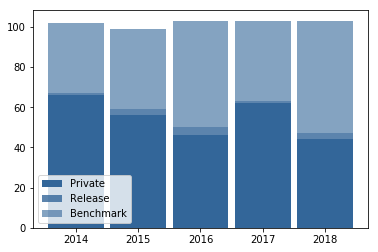

2014 0.35294117647058826 102
2015 0.43434343434343436 99
2016 0.5533980582524272 103
2017 0.39805825242718446 103
2018 0.5728155339805825 103


In [10]:
bnch_counts = [0 for _ in range(5)]
cstm_counts = [0 for _ in range(5)]
csre_counts = [0 for _ in range(5)]

for d in data:
    year = 4 - 2018 + int(d["year"])
    if used_any_benchmark(d):
        try:
            bnch_counts[year] = bnch_counts[year] + 1
        except ValueError:
            print(d["ind"], "needs reviewing")
    elif used_custom_nore(d):
        try:
            cstm_counts[year] = cstm_counts[year] + 1
        except ValueError:
            print(d["ind"], "needs reviewing")
    elif used_custom_re(d):
        try:
            csre_counts[year] = csre_counts[year] + 1
        except ValueError:
            print(d["ind"], "needs reviewing")

years = range(2014, 2019)
plt.bar(years, cstm_counts, 0.9, color=(0.2, 0.4, 0.6, 1.0))
plt.bar(years, csre_counts, 0.9, bottom=cstm_counts, color=(0.2, 0.4, 0.6, 0.8))
plt.bar(years, bnch_counts, 0.9, bottom=np.array(cstm_counts) + np.array(csre_counts), color=(0.2, 0.4, 0.6, 0.6))
plt.legend(["Private", "Release", "Benchmark"], loc="lower left")
plt.show()

for i in range(5):
    print(years[i], (bnch_counts[i]+csre_counts[i])/(bnch_counts[i]+cstm_counts[i]+csre_counts[i]), bnch_counts[i]+cstm_counts[i]+csre_counts[i])


## How's code release over time?

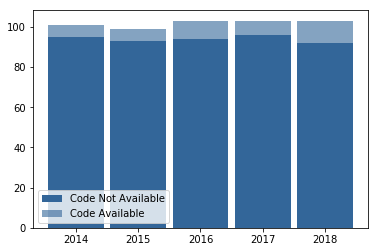

2014 0.0594059405940594
2015 0.06060606060606061
2016 0.08737864077669903
2017 0.06796116504854369
2018 0.10679611650485436


In [11]:
bnch_counts = [0 for _ in range(5)]
cstm_counts = [0 for _ in range(5)]

for d in data:
    year = 4 - 2018 + int(d["year"])
    if not used_custom_data(d) and not used_any_benchmark(d):
        continue
    if released_code(d):
        try:
            bnch_counts[year] = bnch_counts[year] + 1
        except ValueError:
            print(d["ind"], "needs reviewing")
    else:
        try:
            cstm_counts[year] = cstm_counts[year] + 1
        except ValueError:
            print(d["ind"], "needs reviewing")

years = range(2014, 2019)
plt.bar(years, cstm_counts, 0.9, color=(0.2, 0.4, 0.6, 1.0))
plt.bar(years, bnch_counts, 0.9, bottom=cstm_counts, color=(0.2, 0.4, 0.6, 0.6))
plt.legend(["Code Not Available", "Code Available", "Benchmark"], loc="lower left")
plt.show()

for i in range(5):
    print(years[i], bnch_counts[i]/(bnch_counts[i]+cstm_counts[i]))

# How's data release over time?

In [12]:
# TODO

## Log Transformed OLS Prediction of Citations

In [13]:
# Import necessary packages
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [14]:
# Load data into a Pandas DataFrame
data_mat = []
target_mat = []
column_names = ["ind", "is_open_access", "did_release_code", "public_data"]
target_name = ["log_citations"]
for d in data:
    if not used_custom_data(d) and not used_any_benchmark(d):
        continue
    try:
        ind = int(d["ind"])
        years_elapsed = 2019 - int(d["year"])
        if int(d["citations"])/years_elapsed > 100:
            raise ValueError
        is_open_access = int(open_access(d))
        did_release_code = int(released_code(d))
        public_data = int(used_any_benchmark(d))
        targ_val = np.log(int(d["citations"])/years_elapsed+1)
        data_mat = data_mat + [[ind, is_open_access, did_release_code, public_data]]
        target_mat = target_mat + [targ_val]
    except ValueError:
        print("Review", d["ind"])
        
        

Review 37
Review 65
Review 87
Review 166


In [15]:
df_pred = pd.DataFrame(np.array(data_mat), columns=column_names)
df_resp = pd.DataFrame(np.array(target_mat), columns=target_name)
df_pred.describe()

,ind,is_open_access,did_release_code,public_data
count,505.000000,505.000000,505.000000,505.000000
mean,299.487129,0.861386,0.075248,0.441584
std,171.686974,0.345886,0.264052,0.497068
min,2.000000,0.000000,0.000000,0.000000
25%,154.000000,1.000000,0.000000,0.000000
50%,286.000000,1.000000,0.000000,0.000000
75%,454.000000,1.000000,0.000000,1.000000
max,590.000000,1.000000,1.000000,1.000000


In [16]:
df_resp.describe()

,log_citations
count,505.000000
mean,1.199990
std,0.837247
min,0.000000
25%,0.587787
50%,1.098612
75%,1.658228
max,4.094345


In [17]:
X = df_pred[["is_open_access", "did_release_code", "public_data"]]
Y = df_resp["log_citations"]

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

model.summary()

/home/helle246/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_citations   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     14.24
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           6.40e-09
Time:                        00:10:20   Log-Likelihood:                -605.69
No. Observations:                 505   AIC:                             1219.
Df Residuals:                     501   BIC:                             1236.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.7320      0.102      7.150      0.000       0.531       0.933
is_open_access       0.3419      0.104      3.292      0.001       0.138       0.546
did_release_code     0.4240      0.137      3.099      0.002       0.155       0.693
public_data          0.3208      0.073      4.413      0.000       0.178       0.464
==============================================================================
Omnibus:                       25.740   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.324
Skew:                           0.571   Prob(JB):                     7.07e-07
Kurtosis:                       3.201   Cond. No.                         5.64
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
print("THIS UNDERESTIMATES THE RATIO DUE TO THE HIGH PREVALENCE OF LOW-CITATION PAPERS")
print("The log+1 has only a very small effect on most distributions, but a really large one on ours")
print("Public Data Citation increase: {1:0.1f}%.   95% CI: [{0:0.1f}%, {2:0.1f}%]".format(
    100*(np.exp(0.096)-1), # change this to given value
    100*(np.exp(model.params["public_data"])-1), 
    100*(np.exp(0.634)-1) # Change this to given value
))

THIS UNDERESTIMATES THE RATIO DUE TO THE HIGH PREVALENCE OF LOW-CITATION PAPERS
The log+1 has only a very small effect on most distributions, but a really large one on ours
Public Data Citation increase: 37.8%.   95% CI: [10.1%, 88.5%]


## What if I try controlling by restriction plus weighted sum?

OPEN ACCESS AND CODE RELEASE
Excluding... []
Total: 25
10.053333333333335


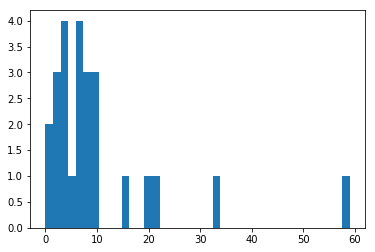



Excluding... [243.66666667]
Total: 8
3.175


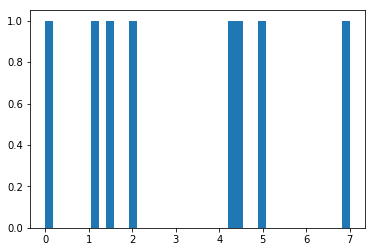

3.1664041994750662
OPEN ACCESS AND NO CODE RELEASE
65 needs reviewing
87 needs reviewing
166 needs reviewing
Excluding... []
Total: 177
5.320527306967985


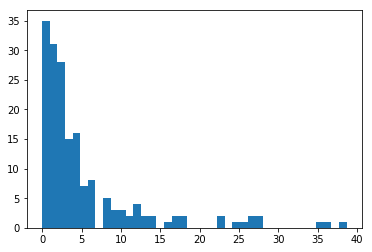



Excluding... []
Total: 226
2.912241887905605


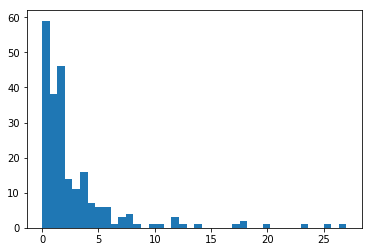

1.8269524001642408
NOT OPEN ACCESS AND CODE RELEASE
Excluding... []
Total: 4
0.9333333333333333


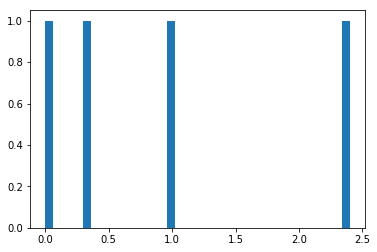



Excluding... []
Total: 1
1.3333333333333333


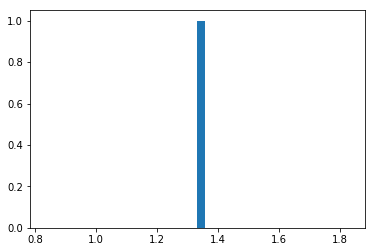

0.7000000000000001
OPEN ACCESS AND NO CODE RELEASE
Excluding... []
Total: 29
3.6011494252873564


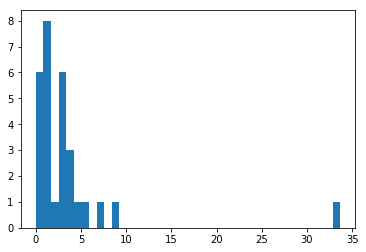



Excluding... []
Total: 36
1.5324074074074074


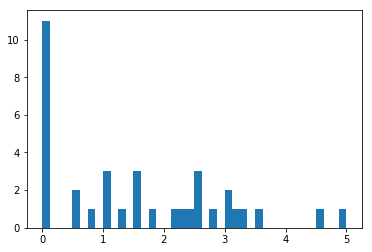

2.3499947911240753
RATIO AFTER CONTROLLING: 1.9718628993566645


In [19]:
print("OPEN ACCESS AND CODE RELEASE")

agg_rat = 0
N = 0

bnch_citations = []
cstm_citations = []
n = 0
for d in [d for d in data if open_access(d) and released_code(d)]:
    if used_any_benchmark(d) or used_custom_re(d):
        try:
            bnch_citations = bnch_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")
        n = n + 1
    elif used_custom_nore(d):
        try:
            cstm_citations = cstm_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")
        n = n + 1

            
# First benchmark
bnch_cits = np.sort(np.array(bnch_citations))
print("Excluding...", bnch_cits[bnch_cits > 100])
print("Total:", bnch_cits[bnch_cits <= 100].shape[0])
print(np.mean(bnch_cits[bnch_cits <= 100]))
plt.hist(bnch_cits[bnch_cits <= 100], bins=40)
plt.show()

print("\n")
# Then custom no release
cstm_cits = np.sort(np.array(cstm_citations))
print("Excluding...", cstm_cits[cstm_cits > 100])
print("Total:", cstm_cits[cstm_cits <= 100].shape[0])
print(np.mean(cstm_cits[cstm_cits <= 100]))
plt.hist(cstm_cits[cstm_cits <= 100], bins=40)
plt.show()

rat = np.mean(bnch_cits[bnch_cits <= 100])/np.mean(cstm_cits[cstm_cits <= 100])
agg_rat = agg_rat + n*rat
N = N + n
print(rat)

print("OPEN ACCESS AND NO CODE RELEASE")

bnch_citations = []
cstm_citations = []
n = 0
for d in [d for d in data if open_access(d) and not released_code(d)]:
    if used_any_benchmark(d) or used_custom_re(d):
        try:
            bnch_citations = bnch_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")
        n = n + 1
    elif used_custom_nore(d):
        try:
            cstm_citations = cstm_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")
        n = n + 1

            
# First benchmark
bnch_cits = np.sort(np.array(bnch_citations))
print("Excluding...", bnch_cits[bnch_cits > 100])
print("Total:", bnch_cits[bnch_cits <= 100].shape[0])
print(np.mean(bnch_cits[bnch_cits <= 100]))
plt.hist(bnch_cits[bnch_cits <= 100], bins=40)
plt.show()

print("\n")
# Then custom no release
cstm_cits = np.sort(np.array(cstm_citations))
print("Excluding...", cstm_cits[cstm_cits > 100])
print("Total:", cstm_cits[cstm_cits <= 100].shape[0])
print(np.mean(cstm_cits[cstm_cits <= 100]))
plt.hist(cstm_cits[cstm_cits <= 100], bins=40)
plt.show()

rat = np.mean(bnch_cits[bnch_cits <= 100])/np.mean(cstm_cits[cstm_cits <= 100])
agg_rat = agg_rat + n*rat
N = N + n
print(rat)


print("NOT OPEN ACCESS AND CODE RELEASE")

bnch_citations = []
cstm_citations = []
n = 0
for d in [d for d in data if not open_access(d) and released_code(d)]:
    if used_any_benchmark(d) or used_custom_re(d):
        try:
            bnch_citations = bnch_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")
        n = n + 1
    elif used_custom_nore(d):
        try:
            cstm_citations = cstm_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")
        n = n + 1

            
# First benchmark
bnch_cits = np.sort(np.array(bnch_citations))
print("Excluding...", bnch_cits[bnch_cits > 100])
print("Total:", bnch_cits[bnch_cits <= 100].shape[0])
print(np.mean(bnch_cits[bnch_cits <= 100]))
plt.hist(bnch_cits[bnch_cits <= 100], bins=40)
plt.show()

print("\n")
# Then custom no release
cstm_cits = np.sort(np.array(cstm_citations))
print("Excluding...", cstm_cits[cstm_cits > 100])
print("Total:", cstm_cits[cstm_cits <= 100].shape[0])
print(np.mean(cstm_cits[cstm_cits <= 100]))
plt.hist(cstm_cits[cstm_cits <= 100], bins=40)
plt.show()

rat = np.mean(bnch_cits[bnch_cits <= 100])/np.mean(cstm_cits[cstm_cits <= 100])
agg_rat = agg_rat + n*rat
N = N + n
print(rat)


print("OPEN ACCESS AND NO CODE RELEASE")

bnch_citations = []
cstm_citations = []
n = 0
for d in [d for d in data if not open_access(d) and not released_code(d)]:
    if used_any_benchmark(d) or used_custom_re(d):
        try:
            bnch_citations = bnch_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")
        n = n + 1
    elif used_custom_nore(d):
        try:
            cstm_citations = cstm_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")
        n = n + 1

            
# First benchmark
bnch_cits = np.sort(np.array(bnch_citations))
print("Excluding...", bnch_cits[bnch_cits > 100])
print("Total:", bnch_cits[bnch_cits <= 100].shape[0])
print(np.mean(bnch_cits[bnch_cits <= 100]))
plt.hist(bnch_cits[bnch_cits <= 100], bins=40)
plt.show()

print("\n")
# Then custom no release
cstm_cits = np.sort(np.array(cstm_citations))
print("Excluding...", cstm_cits[cstm_cits > 100])
print("Total:", cstm_cits[cstm_cits <= 100].shape[0])
print(np.mean(cstm_cits[cstm_cits <= 100]))
plt.hist(cstm_cits[cstm_cits <= 100], bins=40)
plt.show()


rat = np.mean(bnch_cits[bnch_cits <= 100])/np.mean(cstm_cits[cstm_cits <= 100])
agg_rat = agg_rat + n*rat
N = N + n
print(rat)


print("RATIO AFTER CONTROLLING:", agg_rat/N)

## I could also Winsorize here

In [20]:
print("OPEN ACCESS AND CODE RELEASE")

agg_rat = 0
N = 0

bnch_citations = []
cstm_citations = []
n = 0
for d in [d for d in data if open_access(d) and released_code(d)]:
    if used_any_benchmark(d) or used_custom_re(d):
        try:
            bnch_citations = bnch_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")
        n = n + 1
    elif used_custom_nore(d):
        try:
            cstm_citations = cstm_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")
        n = n + 1

            
# First benchmark
bnch_cits = np.sort(np.array(bnch_citations))
# print("Excluding...", bnch_cits[bnch_cits > 100])
bnch_cits[bnch_cits > 50] = 50
print("Total:", bnch_cits.shape[0])
print(np.mean(bnch_cits))
# plt.hist(bnch_cits[bnch_cits <= 100], bins=40)
# plt.show()

print("\n")
# Then custom no release
cstm_cits = np.sort(np.array(cstm_citations))
# print("Excluding...", cstm_cits[cstm_cits > 100])
cstm_cits[cstm_cits > 50] = 50
print("Total:", cstm_cits.shape[0])
print(np.mean(cstm_cits))
# plt.hist(cstm_cits[cstm_cits <= 100], bins=40)
# plt.show()

rat = np.mean(bnch_cits[bnch_cits <= 100])/np.mean(cstm_cits[cstm_cits <= 100])
agg_rat = agg_rat + n*rat
N = N + n
print(rat)

print("OPEN ACCESS AND NO CODE RELEASE")

bnch_citations = []
cstm_citations = []
n = 0
for d in [d for d in data if open_access(d) and not released_code(d)]:
    if used_any_benchmark(d) or used_custom_re(d):
        try:
            bnch_citations = bnch_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")
        n = n + 1
    elif used_custom_nore(d):
        try:
            cstm_citations = cstm_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")
        n = n + 1

            
# First benchmark
bnch_cits = np.sort(np.array(bnch_citations))
# print("Excluding...", bnch_cits[bnch_cits > 100])
bnch_cits[bnch_cits > 50] = 50
print("Total:", bnch_cits.shape[0])
print(np.mean(bnch_cits))
# plt.hist(bnch_cits[bnch_cits <= 100], bins=40)
# plt.show()

print("\n")
# Then custom no release
cstm_cits = np.sort(np.array(cstm_citations))
# print("Excluding...", cstm_cits[cstm_cits > 100])
cstm_cits[cstm_cits > 50] = 50
print("Total:", cstm_cits.shape[0])
print(np.mean(cstm_cits))
# plt.hist(cstm_cits[cstm_cits <= 100], bins=40)
# plt.show()


rat = np.mean(bnch_cits[bnch_cits <= 100])/np.mean(cstm_cits[cstm_cits <= 100])
agg_rat = agg_rat + n*rat
N = N + n
print(rat)


print("NOT OPEN ACCESS AND CODE RELEASE")

bnch_citations = []
cstm_citations = []
n = 0
for d in [d for d in data if not open_access(d) and released_code(d)]:
    if used_any_benchmark(d) or used_custom_re(d):
        try:
            bnch_citations = bnch_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")
        n = n + 1
    elif used_custom_nore(d):
        try:
            cstm_citations = cstm_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")
        n = n + 1

            
# First benchmark
bnch_cits = np.sort(np.array(bnch_citations))
# print("Excluding...", bnch_cits[bnch_cits > 100])
bnch_cits[bnch_cits > 50] = 50
print("Total:", bnch_cits.shape[0])
print(np.mean(bnch_cits))
# plt.hist(bnch_cits[bnch_cits <= 100], bins=40)
# plt.show()

print("\n")
# Then custom no release
cstm_cits = np.sort(np.array(cstm_citations))
# print("Excluding...", cstm_cits[cstm_cits > 100])
cstm_cits[cstm_cits > 50] = 50
print("Total:", cstm_cits.shape[0])
print(np.mean(cstm_cits))
# plt.hist(cstm_cits[cstm_cits <= 100], bins=40)
# plt.show()


rat = np.mean(bnch_cits[bnch_cits <= 100])/np.mean(cstm_cits[cstm_cits <= 100])
agg_rat = agg_rat + n*rat
N = N + n
print(rat)


print("NOT OPEN ACCESS AND NO CODE RELEASE")

bnch_citations = []
cstm_citations = []
n = 0
for d in [d for d in data if not open_access(d) and not released_code(d)]:
    if used_any_benchmark(d) or used_custom_re(d):
        try:
            bnch_citations = bnch_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")
        n = n + 1
    elif used_custom_nore(d):
        try:
            cstm_citations = cstm_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")
        n = n + 1

            
# First benchmark
bnch_cits = np.sort(np.array(bnch_citations))
# print("Excluding...", bnch_cits[bnch_cits > 100])
bnch_cits[bnch_cits > 50] = 50
print("Total:", bnch_cits.shape[0])
print(np.mean(bnch_cits))
# plt.hist(bnch_cits[bnch_cits <= 100], bins=40)
# plt.show()

print("\n")
# Then custom no release
cstm_cits = np.sort(np.array(cstm_citations))
# print("Excluding...", cstm_cits[cstm_cits > 100])
cstm_cits[cstm_cits > 50] = 50
print("Total:", cstm_cits.shape[0])
print(np.mean(cstm_cits))
# plt.hist(cstm_cits[cstm_cits <= 100], bins=40)
# plt.show()



rat = np.mean(bnch_cits[bnch_cits <= 100])/np.mean(cstm_cits[cstm_cits <= 100])
agg_rat = agg_rat + n*rat
N = N + n
print(rat)


print("RATIO AFTER CONTROLLING:", agg_rat/N)

OPEN ACCESS AND CODE RELEASE
Total: 25
9.693333333333333


Total: 9
8.377777777777778
1.1570291777188328
OPEN ACCESS AND NO CODE RELEASE
65 needs reviewing
87 needs reviewing
166 needs reviewing
Total: 177
5.320527306967985


Total: 226
2.912241887905605
1.8269524001642408
NOT OPEN ACCESS AND CODE RELEASE
Total: 4
0.9333333333333333


Total: 1
1.3333333333333333
0.7000000000000001
NOT OPEN ACCESS AND NO CODE RELEASE
Total: 29
3.6011494252873564


Total: 36
1.5324074074074074
2.3499947911240753
RATIO AFTER CONTROLLING: 1.8379045645729155


## Okay actually Fieller's method seems like the best choice

In [21]:
print("OPEN ACCESS AND CODE RELEASE")

agg_rat = 0
N = 0
agg_bnch_resids = []
agg_cstm_resids = []
agg_all_citations = []


bnch_citations = []
cstm_citations = []
strt_citations = []
n = 0
for d in [d for d in data if open_access(d) and released_code(d)]:
    if used_any_benchmark(d) or used_custom_re(d):
        try:
            bnch_citations = bnch_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")
        n = n + 1
    elif used_custom_nore(d):
        try:
            cstm_citations = cstm_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")
        n = n + 1


strt_citations = bnch_citations + strt_citations
agg_all_citations = agg_all_citations + strt_citations
strt_mean = np.mean(strt_citations)

# First benchmark
bnch_cits = np.sort(np.array(bnch_citations))
# print("Excluding...", bnch_cits[bnch_cits > 100])
bnch_cits[bnch_cits > 50] = 50
print("Total:", bnch_cits.shape[0])
print(np.mean(bnch_cits))
# plt.hist(bnch_cits[bnch_cits <= 100], bins=40)
# plt.show()
agg_bnch_resids = agg_bnch_resids + [b - strt_mean for b in bnch_cits]

print("\n")
# Then custom no release
cstm_cits = np.sort(np.array(cstm_citations))
# print("Excluding...", cstm_cits[cstm_cits > 100])
cstm_cits[cstm_cits > 50] = 50
print("Total:", cstm_cits.shape[0])
print(np.mean(cstm_cits))
# plt.hist(cstm_cits[cstm_cits <= 100], bins=40)
# plt.show()
agg_cstm_resids = agg_cstm_resids + [c - strt_mean for c in cstm_cits]

rat = np.mean(bnch_cits[bnch_cits <= 100])/np.mean(cstm_cits[cstm_cits <= 100])
agg_rat = agg_rat + n*rat
N = N + n
print(rat)

print("OPEN ACCESS AND NO CODE RELEASE")

bnch_citations = []
cstm_citations = []
n = 0
for d in [d for d in data if open_access(d) and not released_code(d)]:
    if used_any_benchmark(d) or used_custom_re(d):
        try:
            bnch_citations = bnch_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")
        n = n + 1
    elif used_custom_nore(d):
        try:
            cstm_citations = cstm_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")
        n = n + 1

            
strt_citations = bnch_citations + strt_citations
agg_all_citations = agg_all_citations + strt_citations
strt_mean = np.mean(strt_citations)

# First benchmark
bnch_cits = np.sort(np.array(bnch_citations))
# print("Excluding...", bnch_cits[bnch_cits > 100])
bnch_cits[bnch_cits > 50] = 50
print("Total:", bnch_cits.shape[0])
print(np.mean(bnch_cits))
# plt.hist(bnch_cits[bnch_cits <= 100], bins=40)
# plt.show()
agg_bnch_resids = agg_bnch_resids + [b - strt_mean for b in bnch_cits]

print("\n")
# Then custom no release
cstm_cits = np.sort(np.array(cstm_citations))
# print("Excluding...", cstm_cits[cstm_cits > 100])
cstm_cits[cstm_cits > 50] = 50
print("Total:", cstm_cits.shape[0])
print(np.mean(cstm_cits))
# plt.hist(cstm_cits[cstm_cits <= 100], bins=40)
# plt.show()
agg_cstm_resids = agg_cstm_resids + [c - strt_mean for c in cstm_cits]


rat = np.mean(bnch_cits[bnch_cits <= 100])/np.mean(cstm_cits[cstm_cits <= 100])
agg_rat = agg_rat + n*rat
N = N + n
print(rat)


print("NOT OPEN ACCESS AND CODE RELEASE")

bnch_citations = []
cstm_citations = []
n = 0
for d in [d for d in data if not open_access(d) and released_code(d)]:
    if used_any_benchmark(d) or used_custom_re(d):
        try:
            bnch_citations = bnch_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")
        n = n + 1
    elif used_custom_nore(d):
        try:
            cstm_citations = cstm_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")
        n = n + 1

            
strt_citations = bnch_citations + strt_citations
agg_all_citations = agg_all_citations + strt_citations
strt_mean = np.mean(strt_citations)

# First benchmark
bnch_cits = np.sort(np.array(bnch_citations))
# print("Excluding...", bnch_cits[bnch_cits > 100])
bnch_cits[bnch_cits > 50] = 50
print("Total:", bnch_cits.shape[0])
print(np.mean(bnch_cits))
# plt.hist(bnch_cits[bnch_cits <= 100], bins=40)
# plt.show()
agg_bnch_resids = agg_bnch_resids + [b - strt_mean for b in bnch_cits]

print("\n")
# Then custom no release
cstm_cits = np.sort(np.array(cstm_citations))
# print("Excluding...", cstm_cits[cstm_cits > 100])
cstm_cits[cstm_cits > 50] = 50
print("Total:", cstm_cits.shape[0])
print(np.mean(cstm_cits))
# plt.hist(cstm_cits[cstm_cits <= 100], bins=40)
# plt.show()
agg_cstm_resids = agg_cstm_resids + [c - strt_mean for c in cstm_cits]


rat = np.mean(bnch_cits[bnch_cits <= 100])/np.mean(cstm_cits[cstm_cits <= 100])
agg_rat = agg_rat + n*rat
N = N + n
print(rat)


print("NOT OPEN ACCESS AND NO CODE RELEASE")

bnch_citations = []
cstm_citations = []
n = 0
for d in [d for d in data if not open_access(d) and not released_code(d)]:
    if used_any_benchmark(d) or used_custom_re(d):
        try:
            bnch_citations = bnch_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")
        n = n + 1
    elif used_custom_nore(d):
        try:
            cstm_citations = cstm_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")
        n = n + 1

            
strt_citations = bnch_citations + strt_citations
agg_all_citations = agg_all_citations + strt_citations
strt_mean = np.mean(strt_citations)

# First benchmark
bnch_cits = np.sort(np.array(bnch_citations))
# print("Excluding...", bnch_cits[bnch_cits > 100])
bnch_cits[bnch_cits > 50] = 50
print("Total:", bnch_cits.shape[0])
print(np.mean(bnch_cits))
# plt.hist(bnch_cits[bnch_cits <= 100], bins=40)
# plt.show()
agg_bnch_resids = agg_bnch_resids + [b - strt_mean for b in bnch_cits]

print("\n")
# Then custom no release
cstm_cits = np.sort(np.array(cstm_citations))
# print("Excluding...", cstm_cits[cstm_cits > 100])
cstm_cits[cstm_cits > 50] = 50
print("Total:", cstm_cits.shape[0])
print(np.mean(cstm_cits))
# plt.hist(cstm_cits[cstm_cits <= 100], bins=40)
# plt.show()
agg_cstm_resids = agg_cstm_resids + [c - strt_mean for c in cstm_cits]


rat = np.mean(bnch_cits[bnch_cits <= 100])/np.mean(cstm_cits[cstm_cits <= 100])
agg_rat = agg_rat + n*rat
N = N + n
print(rat)

adjusted_bnch = [a+np.mean(agg_all_citations) for a in agg_bnch_resids]
adjusted_cstm = [a+np.mean(agg_all_citations) for a in agg_cstm_resids]

print(
    "RATIO AFTER CONTROLLING:", 
    np.mean(adjusted_bnch)/
    np.mean(adjusted_cstm)
)

OPEN ACCESS AND CODE RELEASE
Total: 25
9.693333333333333


Total: 9
8.377777777777778
1.1570291777188328
OPEN ACCESS AND NO CODE RELEASE
65 needs reviewing
87 needs reviewing
166 needs reviewing
Total: 177
5.320527306967985


Total: 226
2.912241887905605
1.8269524001642408
NOT OPEN ACCESS AND CODE RELEASE
Total: 4
0.9333333333333333


Total: 1
1.3333333333333333
0.7000000000000001
NOT OPEN ACCESS AND NO CODE RELEASE
Total: 29
3.6011494252873564


Total: 36
1.5324074074074074
2.3499947911240753
RATIO AFTER CONTROLLING: 1.8136757525875156


In [22]:
print(np.mean(adjusted_bnch), np.std(adjusted_bnch), len(adjusted_bnch))
print(np.mean(adjusted_cstm), np.std(adjusted_cstm), len(adjusted_cstm))

5.100457088500085 7.608732576594541 235
2.8122210275036315 4.70315288427249 272
